In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

veri seti

In [4]:
df= pd.read_csv("./USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


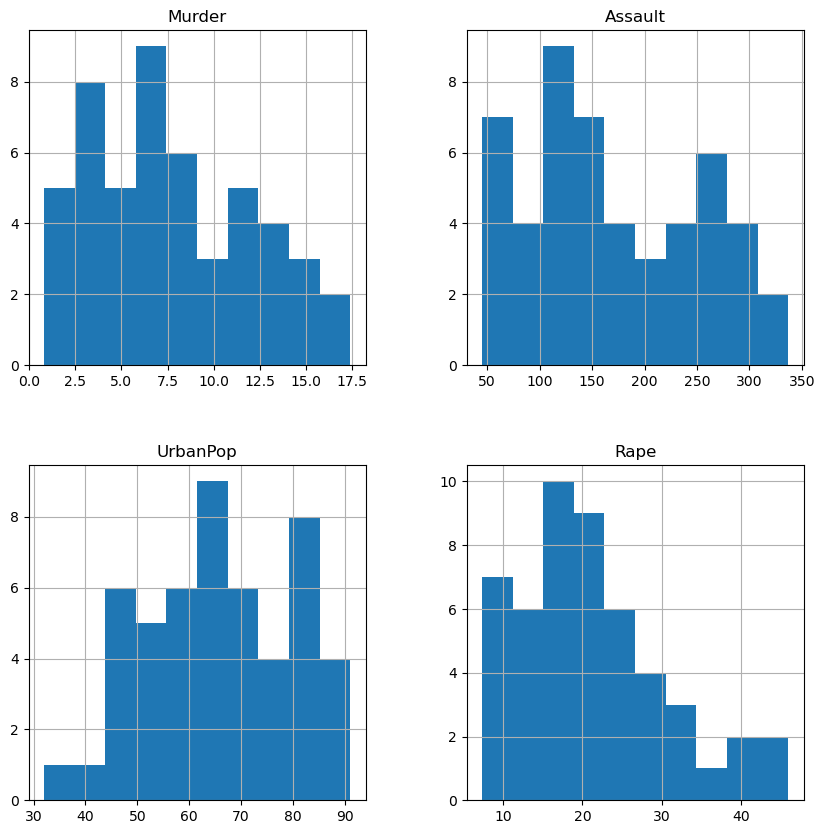

In [8]:
df.hist(figsize=(10,10));

In [9]:
kmeans= KMeans(n_clusters=4)
kmeans

KMeans(n_clusters=4)

In [11]:
k_fit=kmeans.fit(df)

c:\Users\Mehmet Nur Kavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
k_fit.n_clusters

4

In [13]:
k_fit.cluster_centers_

array([[  5.79411765, 129.64705882,  68.29411765,  18.8       ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 10.34285714, 192.28571429,  69.14285714,  24.7       ]])

In [15]:
k_fit.labels_

array([1, 1, 1, 3, 1, 3, 0, 1, 1, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1,
       2, 1, 3, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 3, 1, 2, 3, 3, 0,
       2, 0, 0, 2, 2, 0])

kümelerin görselleştirilmesi

In [16]:
k_means = KMeans(n_clusters=2).fit(df)

c:\Users\Mehmet Nur Kavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
kumeler = k_means.labels_

In [18]:
kumeler

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

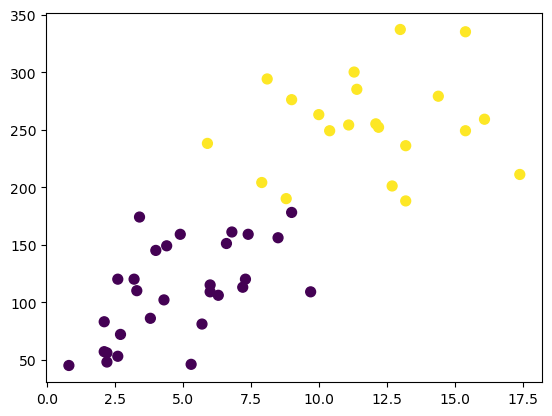

In [25]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=kumeler, s=50, cmap="viridis")

In [26]:
merkezler= k_means.cluster_centers_

In [27]:
merkezler

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

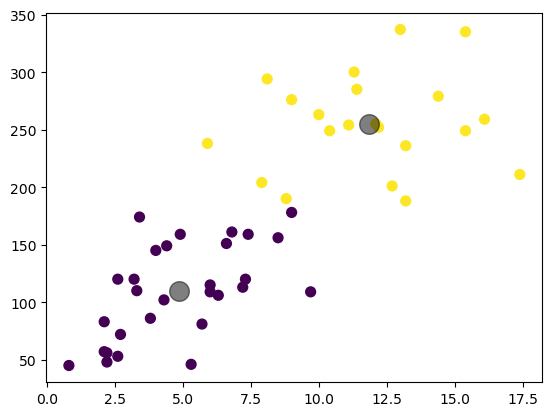

In [29]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=kumeler, s=50, cmap="viridis")
plt.scatter(merkezler[:,0], merkezler[:,1], c="black", s=200, alpha= 0.5)

optimum küme sayısını belirlenmesi

Elbow Yöntemi

In [31]:
df.T

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Murder,13.2,10.0,8.1,8.8,9.0,7.9,3.3,5.9,15.4,17.4,...,3.8,13.2,12.7,3.2,2.2,8.5,4.0,5.7,2.6,6.8
Assault,236.0,263.0,294.0,190.0,276.0,204.0,110.0,238.0,335.0,211.0,...,86.0,188.0,201.0,120.0,48.0,156.0,145.0,81.0,53.0,161.0
UrbanPop,58.0,48.0,80.0,50.0,91.0,78.0,77.0,72.0,80.0,60.0,...,45.0,59.0,80.0,80.0,32.0,63.0,73.0,39.0,66.0,60.0
Rape,21.2,44.5,31.0,19.5,40.6,38.7,11.1,15.8,31.9,25.8,...,12.8,26.9,25.5,22.9,11.2,20.7,26.2,9.3,10.8,15.6


In [35]:
ssd = []
K=range(1,30)
for k in K:
    kmeans = KMeans(n_clusters = k).fit(df)
    ssd.append(kmeans.inertia_)

c:\Users\Mehmet Nur Kavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Mehmet Nur Kavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Mehmet Nur Kavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Mehmet Nur Kavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMe

Text(0.5, 1.0, 'Optimum küme sayısı için Elbow Yöntemi')

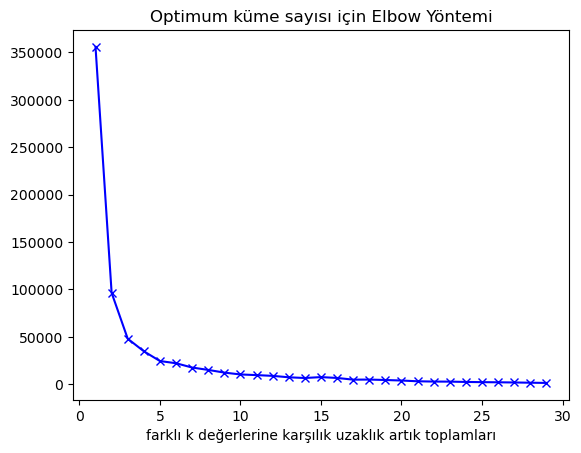

In [37]:
plt.plot(K, ssd, "bx-")
plt.xlabel("farklı k değerlerine karşılık uzaklık artık toplamları")
plt.title("Optimum küme sayısı için Elbow Yöntemi")

daha güzel bir görsel için bu yapılabilir

In [ ]:
#pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [41]:
from yellowbrick.cluster import KElbowVisualizer

c:\Users\Mehmet Nur Kavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Mehmet Nur Kavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Mehmet Nur Kavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Mehmet Nur Kavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMe

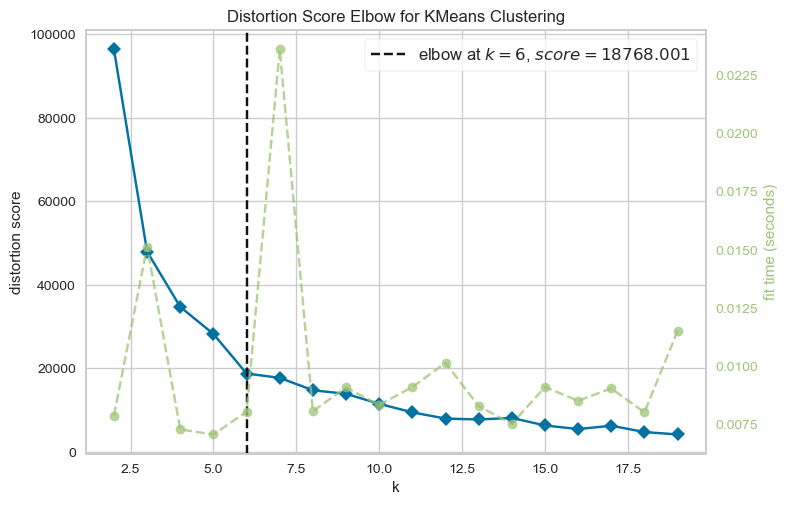

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
kmeans= KMeans()
visu = KElbowVisualizer(kmeans, k= (2,20))
visu.fit(df)
visu.poof()

In [45]:
kmeans= KMeans(n_clusters = 4).fit(df)
kmeans

c:\Users\Mehmet Nur Kavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [46]:
kumeler = kmeans.labels_

In [48]:
pd.DataFrame({"Eyaletler": df.index, "Kumeler": kumeler}).T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Eyaletler,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Kumeler,1,1,1,2,1,2,3,1,1,2,...,0,2,2,3,0,2,2,0,0,2


In [51]:
df["Kume_no"] = kumeler
df.T

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Murder,13.2,10.0,8.1,8.8,9.0,7.9,3.3,5.9,15.4,17.4,...,3.8,13.2,12.7,3.2,2.2,8.5,4.0,5.7,2.6,6.8
Assault,236.0,263.0,294.0,190.0,276.0,204.0,110.0,238.0,335.0,211.0,...,86.0,188.0,201.0,120.0,48.0,156.0,145.0,81.0,53.0,161.0
UrbanPop,58.0,48.0,80.0,50.0,91.0,78.0,77.0,72.0,80.0,60.0,...,45.0,59.0,80.0,80.0,32.0,63.0,73.0,39.0,66.0,60.0
Rape,21.2,44.5,31.0,19.5,40.6,38.7,11.1,15.8,31.9,25.8,...,12.8,26.9,25.5,22.9,11.2,20.7,26.2,9.3,10.8,15.6
Kume_no,1.0,1.0,1.0,2.0,1.0,2.0,3.0,1.0,1.0,2.0,...,0.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0,0.0,2.0
